Compare with analytical solution (sedov_100 seems to have t~8e-5)

In [1]:
import sys
sys.path.append('/Users/paolamartire/shocks')

import numpy as np
import matplotlib.pyplot as plt
import Utilities.prelude
from Utilities.time_extractor import days_since_distruption

In [2]:
def analytic_sol(t):
    return (2/5 * t)

In [28]:
shock_surface100 = np.loadtxt('shocksurface_100.txt')
xshock100 = shock_surface100[0]
yshock100 = shock_surface100[1]
zshock100 = shock_surface100[2]
rshock100 = np.sqrt(xshock100**2 + yshock100**2 + zshock100**2)
R100 = np.mean(rshock100)
t100, _ = days_since_distruption('sedov/100/sedov_100.h5')

shock_surfacefinal = np.loadtxt('shocksurface_final.txt')
xshockfinal = shock_surfacefinal[0]
yshockfinal = shock_surfacefinal[1]
zshockfinal = shock_surfacefinal[2]
rshockfinal = np.sqrt(xshockfinal**2 + yshockfinal**2 + zshockfinal**2)
Rfinal = np.mean(rshockfinal)
tfinal, _ = days_since_distruption('sedov/final/sedov_final.h5')

vshockmiddle = (Rfinal - R100) / (tfinal - t100)
ratiomiddle = Rfinal/vshockmiddle #I should have Rmiddle
tmiddle = tfinal# should be tmiddle, as(tfinal + t100)/2


time = np.arange(0, tfinal+0.03, 0.001)
analytic = analytic_sol(time)

/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_14547/3452492955.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time = np.arange(0, tfinal+0.03, 0.001)


In [29]:
t100

array([0.00427279])

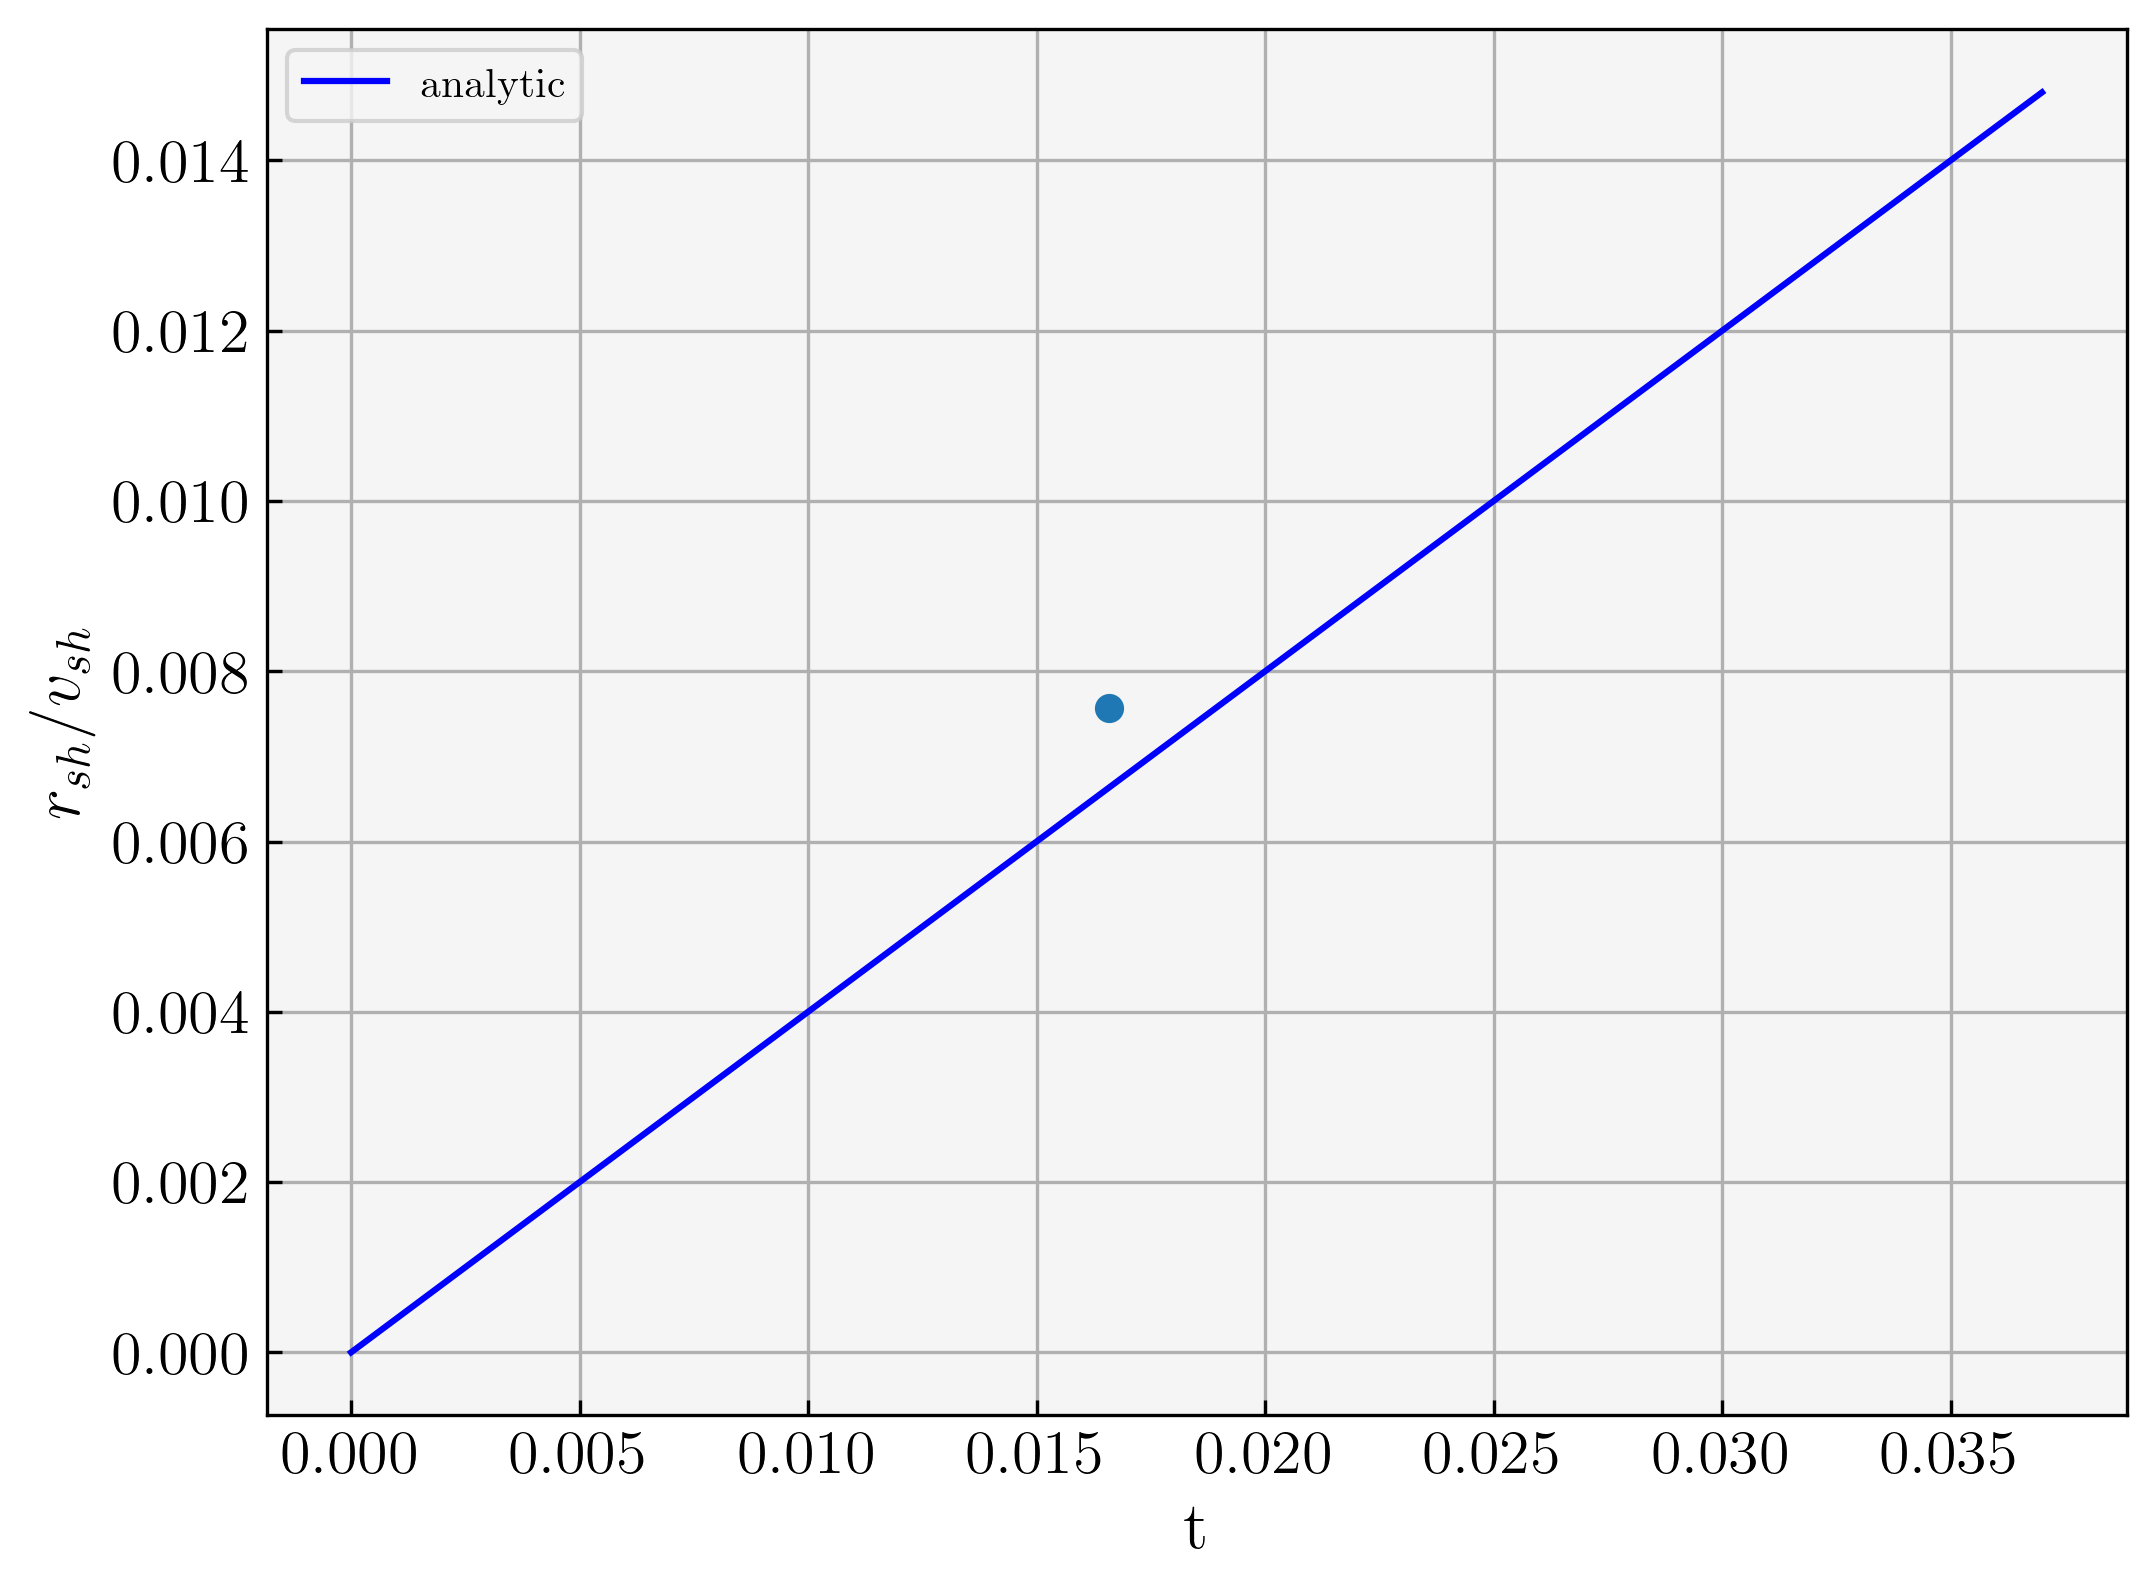

In [30]:
plt.plot(time, analytic, color = 'b', label = 'analytic')
plt.scatter(ratiomiddle,tmiddle)
plt.scatter
plt.xlabel('t', fontsize = 16)
plt.ylabel(r'$r_{sh}/v_{sh}$', fontsize = 16)
plt.legend()
plt.grid()